# The Rise of Carlos Alcaraz

### By: Yuki Kuwahara

When we talk about the ATP Tour today, Carlos Alcaraz is a name that never fails to be brought up. At only 19 years old, he has reached the Number 1 Ranking in the Singles Professional Rankings, which was attained when he triumped at the 2022 US Open - one of the four grand slam tournaments held annually. Additionally, he is the youngest player in the ATP Tour History to be named the Year-End Number 1 Ranking, surprassing Lleyton Hewitt. 

But the question arises: How was he able to have an extraordinary season in 2022? In addition to his Number 1 Ranking achievement and winning a Grand Slam, he has won 4 additional titles, including 2 Masters 1000 Tournaments in Miami, Florida and Madrid, Spain. He only broke into the Top 100 in May 2021, and only a little over year later, a success which many people and even current professional players believe and hope to achieve later on in their careers.

To figure this out, we will be using data from the 2021 and 2022 ATP matches. Although Carlos Alcaraz has played a few ATP Tour Matches prior to 2021, most of his matches then comes from ATP Challenger Tournaments (known as "Satellite" Tournaments). We will not be utilizing those data as there are not many matches played in those years in order to make a meaningful comparison and analysis.

The source of the data is: https://github.com/JeffSackmann/tennis_atp/tree/master

In this analysis, we will be comparing ATP Tour match statistics of Carlos Alcaraz in 2021 and 2022 to figure if there are any significant patterns that can lead to a conclusion of his extraordinary 2022 season on the ATP Tour.

In [136]:
#importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

## Part 1: Data Cleaning

Let's take a look at the dataframe of the ATP Matches. 

In [137]:
matches_2021 = pd.read_csv("~/Desktop/Datasets/atp_matches_2021.csv")
matches_2022 = pd.read_csv("~/Desktop/Datasets/atp_matches_2022.csv")

In [138]:
matches_2021.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-0096,Tokyo Olympics,Hard,64,A,20210724,237,126207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,1228.0,71.0,996.0
1,2021-0096,Tokyo Olympics,Hard,64,A,20210724,238,105526,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,1410.0,95.0,829.0
2,2021-0096,Tokyo Olympics,Hard,64,A,20210724,239,111576,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,160.0,471.0,197.0,354.0
3,2021-0096,Tokyo Olympics,Hard,64,A,20210724,240,105357,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1476.0,61.0,1106.0
4,2021-0096,Tokyo Olympics,Hard,64,A,20210724,241,207830,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,145.0,525.0,137.0,570.0


In [139]:
matches_2022.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NaN,NaN,...,50.0,32.0,7.0,10.0,3.0,5.0,11.0,3308.0,19.0,2260.0
1,2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NaN,NaN,...,33.0,21.0,8.0,9.0,3.0,6.0,14.0,2475.0,20.0,2230.0
2,2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NaN,NaN,...,80.0,62.0,20.0,16.0,6.0,7.0,19.0,2260.0,9.0,3706.0
3,2022-8888,Atp Cup,Hard,16,A,20220103,297,105807,NaN,NaN,...,27.0,17.0,1.0,7.0,4.0,8.0,20.0,2230.0,860.0,18.0
4,2022-8888,Atp Cup,Hard,16,A,20220103,296,106421,NaN,NaN,...,35.0,22.0,4.0,8.0,3.0,7.0,2.0,8640.0,11.0,3308.0


Let's see the columns in the dataframes.

In [140]:
matches_2021.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [141]:
#Sanity check to see if the column names for both dataframes are the same.
list(matches_2021.columns) == list(matches_2022.columns)

True

Let's convert the 2 dataframes into 4 dataframes. 1 dataframe with matches in 2021 that Carlos Alcaraz won, 1 dataframe with matches in 2021 that Carlos Alcaraz that lost. The same applies for 2022 matches.

In [142]:
alcaraz_2021_win = matches_2021[matches_2021["winner_name"] == "Carlos Alcaraz"]
alcaraz_2021_lose = matches_2021[matches_2021["loser_name"] == "Carlos Alcaraz"]
alcaraz_2022_win = matches_2022[matches_2022["winner_name"] == "Carlos Alcaraz"]
alcaraz_2022_lose = matches_2022[matches_2022["loser_name"] == "Carlos Alcaraz"]

Using the dictionary for the column names in this dataframe provided by the source (https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt), we will use the statistics that are best believed to be the most represetative or influencial in the outcome of a match. Rationale will be provided below.

- w_ace (Number of aces hit in winning matches)
- w_df (Number of double faults hit in winning matches)
- w_1stIn (Number of first serves made in winning matches)
- w_1stWon (Number of first serve points won in winning matches)
- w_bpFaced (Number of break points faced in winning matches)
- l_aces (Number of aces hit in losing matches)
- l_df (Number of double faults hit in losing matches)
- l_1stIn (Number of first serves made in losing matches)
- l_1stWon (Number of first serve points won in losing matches)
- l_bpsFaced(Number of break points faced in losing matches)

Rationale of the statistics used:
- **Number of Aces** : Aces are unreturnable serves hit by the player. The more aces the better, as aces are regarded as "free points".

- **Number of Double Faults** : Double faults are two consecutive serve errors by a player in a single point. Double faults are considered "giving away free points", thus less is better in this case.

- **Number of 1st Serves In**: Since first serves are usually the faster and more powerful between the two serves that are given to player, the number of first serves put in is very critical. First serves also are serves usually to set up a point favorable for the player that is serving. Thus, hitting more first serve is better.

- **Number of 1st Serve Points Won**: Winning more first serve points means that the player who is serving is able to effectively use their first serves to set up the point and win those points. If they are losing their first serve points, they are not using their first serves effectively. Thus, more is better.

- **Number of Break Points Faced**: Since break points are points where the player who is serving is "about to lose" their service game, it is not very favorable to face break points. Break points also indicates that the player either has a weak serve, or has a weak service game in general. Less Break points faced, the better.

Let's now filter the dataframes down to these 4 columns.

In [143]:
win_filter = ["w_ace", "w_df", "w_1stIn", "w_1stWon", "w_bpFaced"]
lose_filter = ["l_ace", "l_df", "l_1stIn", "l_1stWon", "l_bpFaced"]

alcaraz_2021_win_filtered = alcaraz_2021_win[win_filter]
alcaraz_2021_lose_filtered = alcaraz_2021_lose[lose_filter]
alcaraz_2022_win_filtered = alcaraz_2022_win[win_filter]
alcaraz_2022_lose_filtered = alcaraz_2022_lose[lose_filter]

Before merging the dataframes, let's rename the columns. Number of aces hit in winning or losing matches does not matter, as we are grouping the matches into 2 separate years, not the outcome of the match.

So, 
- w_ace or l_ace -> aces
- w_df or l_df -> dfs
- w_1stIn or l_1stIn -> 1stIn
- w_1stWon or l_1stWon -> 1stWon
- w_bpFaced or l_bpFaced -> bpFaced

In [144]:
rename_win = {"w_ace": "aces", "w_df": "dfs", "w_1stIn":"1stIn", "w_1stWon": "1stWon", "w_bpFaced":"bpFaced"}
rename_lose = {"l_ace": "aces", "l_df": "dfs", "l_1stIn":"1stIn", "l_1stWon": "1stWon", "l_bpFaced":"bpFaced"}

alcaraz_2021_win_filtered = alcaraz_2021_win_filtered.rename(columns = rename_win)
alcaraz_2021_lose_filtered = alcaraz_2021_lose_filtered.rename(columns = rename_lose)
alcaraz_2022_win_filtered = alcaraz_2022_win_filtered.rename(columns = rename_win)
alcaraz_2022_lose_filtered = alcaraz_2022_lose_filtered.rename(columns = rename_lose)

Let's now merge the 2 dataframes of 2021 into one and same from 2022, resulting into 2 separate dataframes, and check them out.

In [145]:
alcaraz_2021 = pd.concat([alcaraz_2021_win_filtered, alcaraz_2021_lose_filtered])
alcaraz_2021.head()

,aces,dfs,1stIn,1stWon,bpFaced
290,3.0,1.0,39.0,25.0,9.0
303,3.0,1.0,41.0,24.0,10.0
309,6.0,4.0,61.0,49.0,1.0
347,2.0,2.0,69.0,48.0,5.0
369,3.0,4.0,45.0,36.0,2.0


In [146]:
alcaraz_2022 = pd.concat([alcaraz_2022_win_filtered, alcaraz_2022_lose_filtered])
alcaraz_2022.head()

,aces,dfs,1stIn,1stWon,bpFaced
174,12.0,3.0,42.0,33.0,1.0
232,3.0,3.0,61.0,45.0,1.0
509,1.0,0.0,34.0,26.0,4.0
510,0.0,3.0,52.0,35.0,6.0
512,1.0,4.0,41.0,30.0,2.0


Let's make sure that the dataframes have no rows (matches) that have NaN values, or missing data, so that we can conduct more clear analysis later on.

In [147]:
#For 2021 Dataframe
for column in list(alcaraz_2021.columns):
    if alcaraz_2021[column].isnull().values.any():
        print("True");
    else:
        print("False");

False
False
False
False
False


In [148]:
#For 2022 Dataframe
for column in list(alcaraz_2022.columns):
    if alcaraz_2022[column].isnull().values.any():
        print("True");
    else:
        print("False");

True
True
True
True
True


There is a row that is missing some data. Let's see which row it is, and remove it from the dataframe, in this case, the Matches from 2022.

In [149]:
alcaraz_2022[alcaraz_2022.isna().any(axis=1)]

,aces,dfs,1stIn,1stWon,bpFaced
2724,NaN,NaN,NaN,NaN,NaN
2722,NaN,NaN,NaN,NaN,NaN


Looks like we have 2 matches from 2022 that have missing values. The matches with the missing values seems like toward the end of the season (based on the indexing). This is likely due to either:

1. Simply data missing from the dataset
2. Carlos Alcaraz withdrawing from the match before playing due to some reason (such as injuries)


Let's remove these rows, and then check if there are no rows with NaN/missing values.

In [150]:
alcaraz_2022 = alcaraz_2022[alcaraz_2022.notna().any(axis=1)]

In [151]:
#For 2022 Dataframe, again
for column in list(alcaraz_2022.columns):
    if alcaraz_2022[column].isnull().values.any():
        print("True");
    else:
        print("False");

False
False
False
False
False


Perfect, we have filtered out the matches in 2022 that had missing data. Let's now see how many matches Carlos Alcaraz played in each year, given that there are no missing data.

In [152]:
len(alcaraz_2021)

49

In [153]:
len(alcaraz_2022)

68

Note that we will be calculating the average of the statistics for each dataframe. Since the number of matches Carlos Alcaraz has played in 2021 and 2022 is different (he has played in 19 more matches in 2022, given no missing data), it is better to utilize the average values to make an analysis rather than summing up the total, which may lead to misleading anaylsis and conclusion.

In [154]:
alcaraz_2021_mean = alcaraz_2021.mean(axis=0)
alcaraz_2022_mean = alcaraz_2022.mean(axis=0)

alcaraz_2021_data = {
    "stat": list(alcaraz_2021_mean.index),
    "value": list(alcaraz_2021_mean.values)
}

alcaraz_2022_data = {
    "stat": list(alcaraz_2022_mean.index),
    "value": list(alcaraz_2022_mean.values)
}

alcaraz_2021_mean_df = pd.DataFrame(alcaraz_2021_data, columns=["stat", "value"])
alcaraz_2022_mean_df = pd.DataFrame(alcaraz_2022_data, columns=["stat", "value"])

alcaraz_combined = pd.concat([alcaraz_2021_mean_df, alcaraz_2022_mean_df], axis=0)

Let's take a look at the dataframe to see if they are implemented properly. 

In [155]:
alcaraz_combined

,stat,value
0,aces,3.081633
1,dfs,2.183673
2,1stIn,48.734694
3,1stWon,33.183673
4,bpFaced,7.306122
0,aces,3.808824
1,dfs,2.544118
2,1stIn,55.250000
3,1stWon,39.691176
4,bpFaced,5.926471


Let's also add a years column so that we can differentiate between 2021 and 2022 year statistics. The first five rows are from 2021, and next 5 rows are from 2022.

In [156]:
year_list = ["2021" for i in range(5)] + ["2022" for i in range(5)]
alcaraz_combined["year"] = year_list

alcaraz_combined

,stat,value,year
0,aces,3.081633,2021
1,dfs,2.183673,2021
2,1stIn,48.734694,2021
3,1stWon,33.183673,2021
4,bpFaced,7.306122,2021
0,aces,3.808824,2022
1,dfs,2.544118,2022
2,1stIn,55.250000,2022
3,1stWon,39.691176,2022
4,bpFaced,5.926471,2022


Great! Our dataframe is cleaned up and is now ready for some analysis.

## Part 2: The Analysis - Carlos Alcaraz in 2021 vs 2022

Let's visualize the dataframe that we have organized from above.

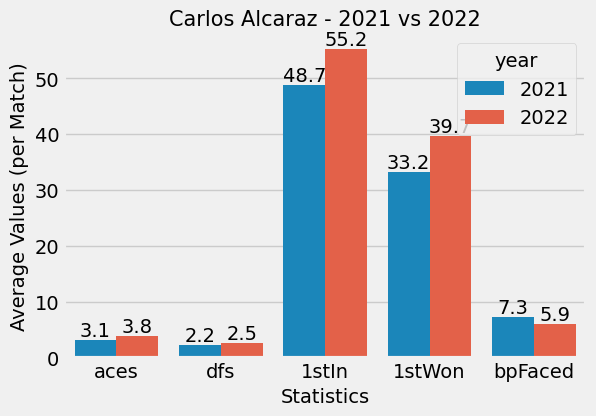

In [157]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.barplot(data = alcaraz_combined, x = "stat", y = "value", hue= "year");

plt.xlabel("Statistics")
plt.ylabel("Average Values (per Match)")
plt.title("Carlos Alcaraz - 2021 vs 2022", fontsize = 15)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

From the barplot above, we can see that there is in fact quite a difference for 1st serves in, 1st service points won, and break points faced. We can can see that Alcaraz on average, put in nearly 7 (6.5 difference from 48.7 and 55.2) more first serves in 2022 compared to 2021, which indicates that he has improved his first serves and thus being able to be more aggressive and be on the offensive. And likely due to that fact, we also see that Alcaraz has won more 1st service points in 2022, which winning again, nearly 7 (6.5 difference from 39.7 and 33.2) more points compared to 2021. If we do some calculations: 

$$ change_{2021} = \frac{33.2}{48.7} = 0.682 $$

$$ change_{2022} = \frac{39.7}{55.2} = 0.719 $$

We can see that on average, Alcaraz has won 68.2% (very high!) of his first service points. However in 2022, that spikes up to 71.9%, which is nearly a 4% increase. Although 4% can seem like a small difference, where matches become longer and more points are played, a 4% difference can be the difference to winning or losing a match, so the 4% increase in first service points won is quite impressive.

We also see that Alcaraz has faced 7.3 break points on average in 2021, compared to 5.9 in 2022. The number of break points faced is a statistic that we would like to see a decrease in, so facing 1.4 break points, or somewhere around 1 to 2 less break points per match means that Alcaraz is performing better in points before he may possibly face a break point. This means that he is more aggressive in points before the break points (and generally), which can also indicate his improvement in mental strength when in higher pressure situations.

The surprising part comes from the smaller difference between aces and double faults. Starting at double faults, 2.2 double faults on average in 2021 and 2.5 double faults on average in 2022 does not necessary signify anything significant. This small increase in double faults could be caused by simply having a bad serving period in a short period of matches, or Alcaraz slightly being more aggressive on his second serves. However, we would likely say this difference is again, pretty negligible. In terms of aces, Alcaraz has hit 3.1 aces on average in 2021 compared to 3.8 aces on average in 2022. It is surprising to see based on how successful his 2022 season was, the number of aces was not as different as believed. We could round these numbers and say that Alcaraz hit 3 aces on average in 2021 compared to 4 in 2022, thus hitting nearly one more ace is quite surprising, as the amount of first serves he has put in has increased quite a lot, but the similar increase in aces is not apparent. One more ace means that he is winning one more "free" point which can be a difference maker in matches in critical moments, but it shows that based on his increase of 1st service points won on average, his game heavily relies on his strong groundstrokes and other technical shots such as drop shots.

Let's now visualize the difference of the change of values in statstics between 2021 and 2022.

In [158]:
difference = (alcaraz_2022_mean - alcaraz_2021_mean) / alcaraz_2021_mean

diff = pd.DataFrame(difference)
diff.reset_index(inplace=True)
diff = diff.rename(columns={"index":"stat", 0:"% difference"})

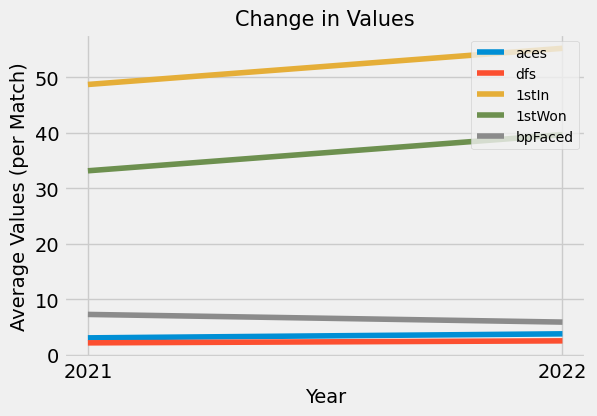

In [159]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.lineplot(data = alcaraz_combined, x = "year", y = "value", hue = "stat");

plt.xlabel("Year")
plt.ylabel("Average Values (per Match)")
plt.legend(loc='upper right', fontsize = 10)

plt.title("Change in Values", fontsize = 15);

The lineplot above does not really tell too much. Altough we can see which statistics increased and decreased from 2021 to 2022, the difference does not seem to be very easy to comprehend. Let's visualize is using barplots.

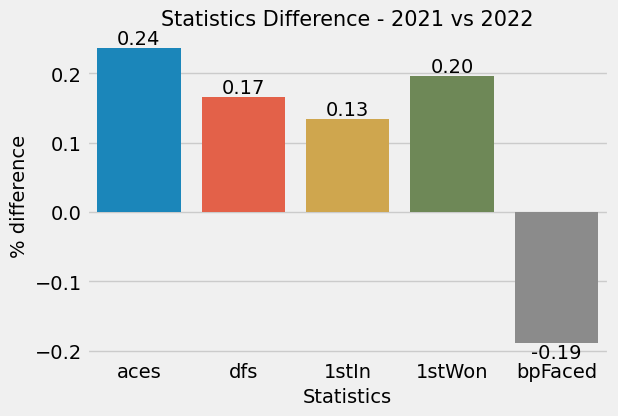

In [160]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.barplot(data=diff, x = "stat", y = "% difference");

plt.xlabel("Statistics")
plt.ylabel("% difference")
plt.title("Statistics Difference - 2021 vs 2022", fontsize = 15)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

We can see the percent difference of the different statistics from 2021 to 2022. Positive difference means that there was an increase of the value per match from 2021 to 2022, and the opposite for negative difference. Although some of the percentages can seem quite significant, we have to realize that for statistics such as aces and double faults are not as significant as 1st serves in, 1st service points won, and break points faced. However, it is impressive to see that besides double faults, Alcaraz has improved in areas that are important to the matches. If Alcaraz can continue this trend or similar year by year, we may see a new "GOAT" conversation arise in the near future.

## Part 3: Conclusion

Overall, we were able to spot some of the match statistics that have lead Carlos Alcaraz to have an impressive 2022 season, compared to his 2021 season where he broke into the Top 100. Here are some critical points:

1) Alcaraz hit more 1st serves in on average per match (55.2 vs 48.7) in 2022 compared to 2021
2) Alcaraz won more 1st service points on average per match (39.7 vs 33.2) in 2022 compared to 2021
3) Alcaraz hit nearly 1 more ace on average in 2022 compared to 2021
4) Alcaraz faced a little over 1 break point less in 2022 than 2021

The difference in number of double faults hit in 2022 and 2021 is very minimal, so we will not be including this.

Although these statistics do not necessarily explain every reason why Carlos Alcaraz became very successful in 2022, the points that were believed to make the most difference in fact, did show a significant improvement compared to 2021.